## Salifort Motors project
 
### Provide data-driven suggestions for HR

Currently, there is a high rate of turnover among Salifort employees. (Note: In this context, turnover data includes both employees who choose to quit their job and employees who are let go). Salifort’s senior leadership team is concerned about how many employees are leaving the company. Salifort strives to create a corporate culture that supports employee success and professional development. Further, the high turnover rate is costly in the financial sense. Salifort makes a big investment in recruiting, training, and upskilling its employees. 

If Salifort could predict whether an employee will leave the company, and discover the reasons behind their departure, they could better understand the problem and develop a solution. 

As a first step, the leadership team asks Human Resources to survey a sample of employees to learn more about what might be driving turnover.  

Next, the leadership team asks you to analyze the survey data and come up with ideas for how to increase employee retention. To help with this, they suggest you design a model that predicts whether an employee will leave the company based on their job title, department, number of projects, average monthly hours, and any other relevant data points. A good model will help the company increase retention and job satisfaction for current employees, and save money and time training new employees. 

### **What’s likely to make the employee leave the company?**

### Deliverables

Analyze the key factors driving employee turnover, build an effective model, and share recommendations for next steps with the leadership team.

- Model evaluation
- Data visualizations
- Ethical considerations
- Resources
- One-page summary of this project

### HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

In [1]:
# Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option("display.max_columns", None)

# For data modeling
# Pip 21.3+ is required 
# use `%` or `!`
%pip install xgboost

from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful function
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Load dataset
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### EDA

In [4]:
# Basic information
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Descriptive statistics
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Rename columns names to standardize

# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns
df0 = df0.rename(columns={"average_montly_hours": "average_monthly_hours",
                          "time_spend_company": "tenure",
                          "Work_accident": "work_accident",
                          "Department": "department"})
# Display column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

No missing values

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

3,008 rows contain duplicate values. That is 20% of the data

In [10]:
# Inspect some rows containing duplicates
df0[df0.duplicated()].head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


Since there are 10 columns with some of them containing continous variables, it seems unlikely for the duplicate observations to be legitimate.

In [11]:
# Drop duplicates, save resulting dataframe in a new variable
df1 = df0.drop_duplicates(keep="first")

df1.head(10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Check for outliers

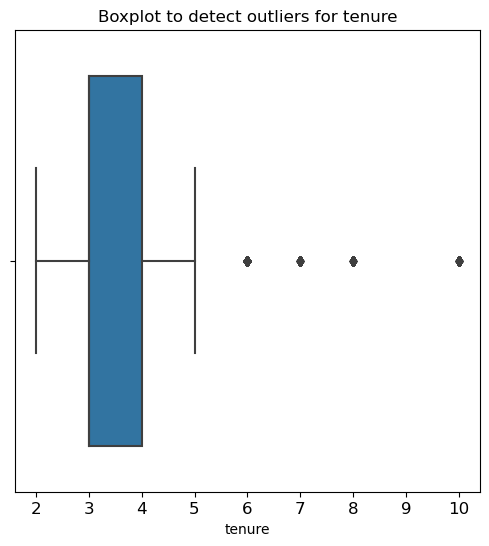

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title("Boxplot to detect outliers for tenure", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1["tenure"])
plt.show()

Investigate how many rows in contain outliers in the `tenure` column

In [13]:
# Determine the number of rows containing outliers

# 25th percentile
percentile25 = df1["tenure"].quantile(0.25)

# 75th percentile
percentile75 = df1["tenure"].quantile(0.75)

# IQR
iqr = percentile75 - percentile25

# upper and lower limit
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("upper limit:", upper_limit)
print("lower limit:", lower_limit)

# subset of data containing outliers
outliers = df1[(df1["tenure"] > upper_limit) | (df1["tenure"] < lower_limit)]

# count rows
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

upper limit: 5.5
lower limit: 1.5
Number of rows in the data containing outliers in `tenure`: 824


In [15]:
# Number of people who left vs. stayed
print(df1["left"].value_counts())
print()

# Percentage of people who left vs. stayed
print(df1["left"].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

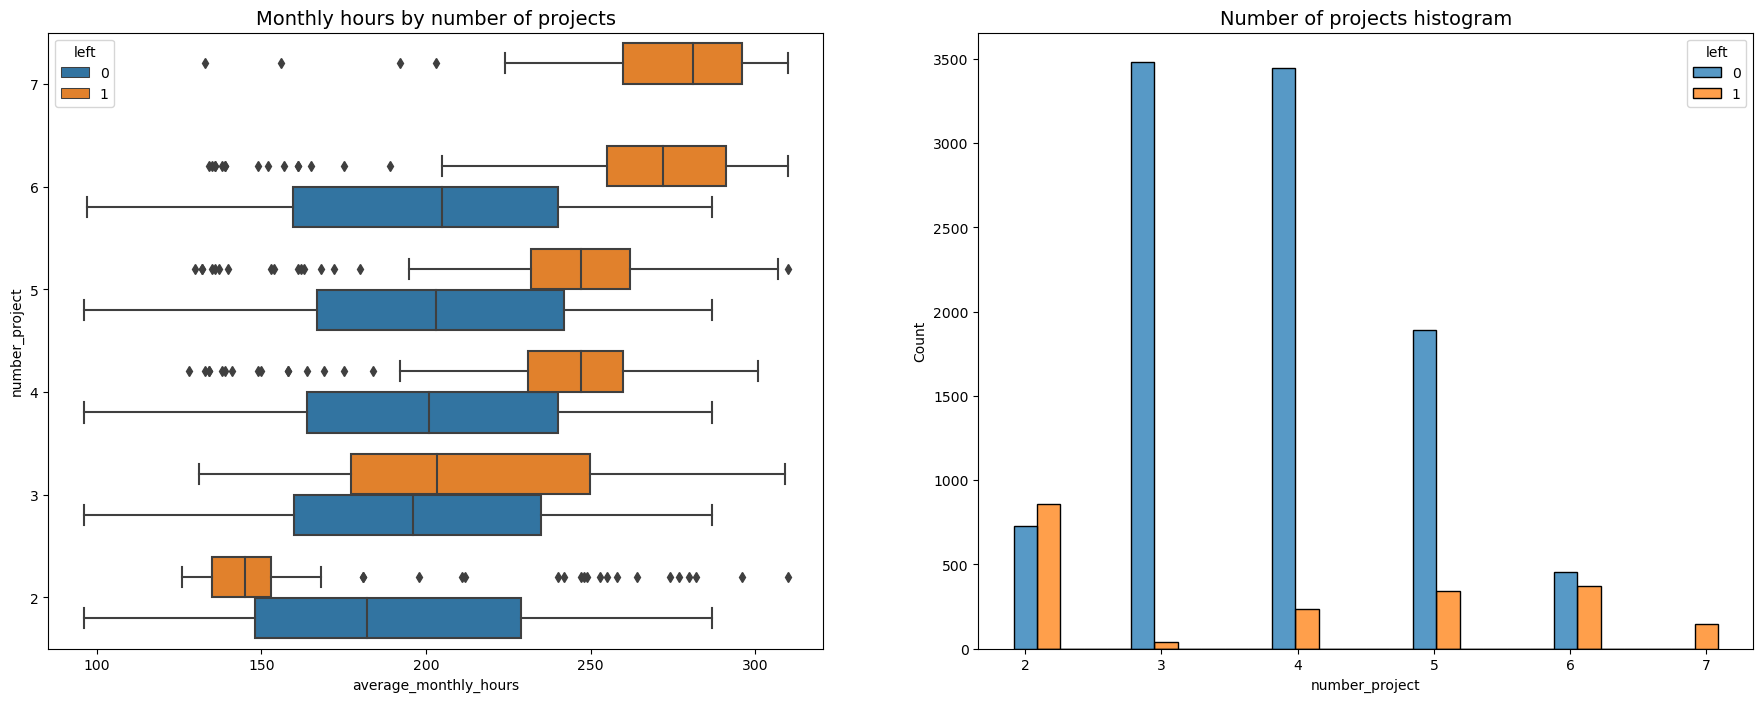

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(22,8))

# Boxplot `average_monthly_hours` for `number_project
# comparing left vs. stayed
sns.boxplot(data=df1,
            x="average_monthly_hours",
            y="number_project",
            hue="left",
            orient="h",
           ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly hours by number of projects", fontsize="14")

# Histogram of number of projects distribution
# comparing left vs. stayed
tenure_stay = df1[df1["left"]==0]["number_project"]
tenure_left = df1[df1["left"]==1]["number_project"]
sns.histplot(data=df1,
             x="number_project",
             hue="left",
             multiple="dodge",
             shrink=2,
             ax=ax[1])
ax[1].set_title("Number of projects histogram", fontsize="14")

plt.show()

Assume a  work week of 40 hour a week and two weeks vacation per year.
The average number of wokring hours per month per employees working Monday-Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`

It seems that employees here are overworked.

There are two groups of employees who left the company: (A) those who worked less hours and in fewer projects and (B) those who worked more hours and in more projects.

Group A employees were assigned 2 projects and it may be due to the fact that they most probably were let go.
On the other hand Group B employees that were assigned 7 projects all left.

Employees who worked on 3 or 4 projects seem to have the best retention.

In [25]:
# Get value counts of stayed/left for employees with  projects
df1[df1["number_project"]==7]["left"].value_counts()

left
1    145
Name: count, dtype: int64

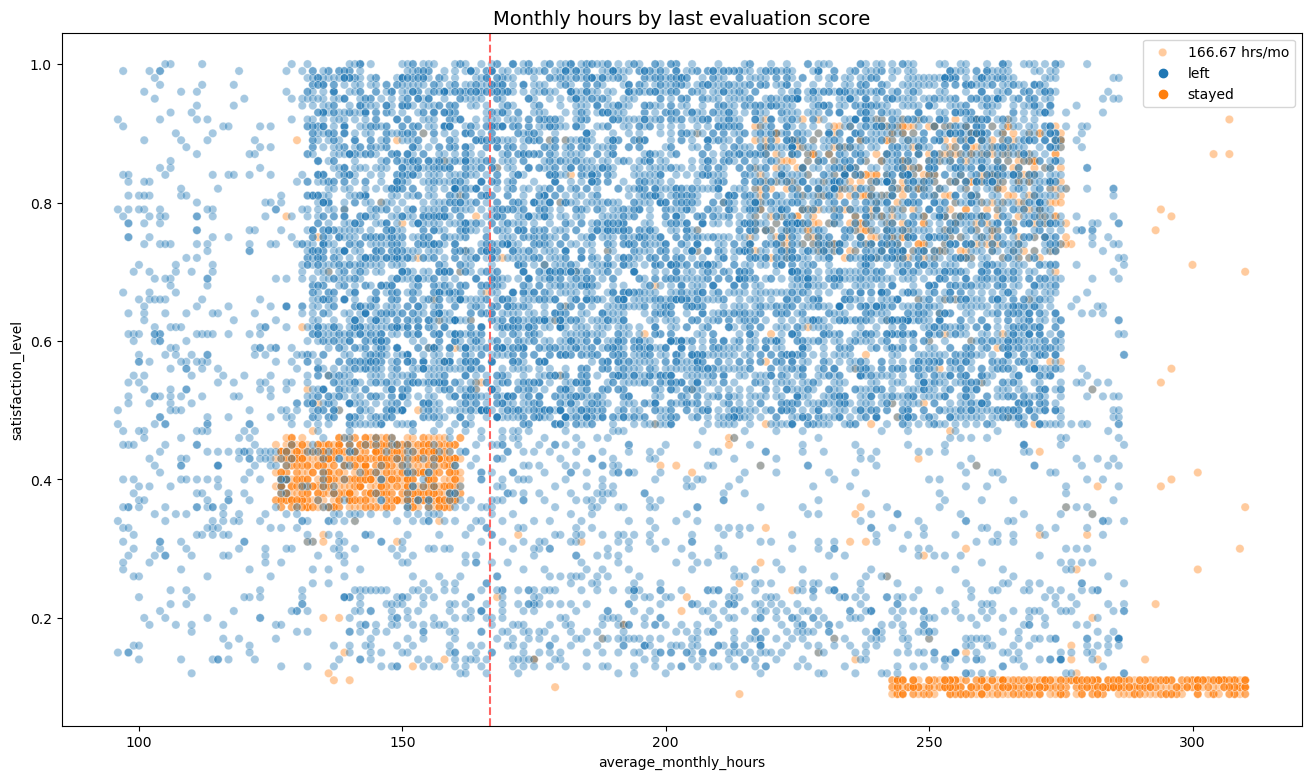

In [27]:
# Scatterplot of `average_monthly_hours` vs. `satisfaction_level
# comparing left vs. stayed
plt.figure(figsize=(16,9))
sns.scatterplot(data=df1,
                x="average_monthly_hours",
                y="satisfaction_level",
                hue="left",
                alpha=0.4)
plt.axvline(x=166.67,
            color="#ff6361",
            label="166.67 hrs/mo",
            ls="--")
plt.legend(labels=["166.67 hrs/mo", "left", "stayed"])
plt.title("Monthly hours by last evaluation score", fontsize="14");